In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore' , category=FutureWarning)

In [15]:
data = pd.read_csv('/content/car data.csv')

EDA

In [23]:
data.head(15)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [17]:
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [28]:
data.duplicated().sum()

np.int64(2)

In [31]:
data.drop_duplicates(inplace = True)

In [34]:
data.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Kms_Driven,int64
Fuel_Type,object
Seller_Type,object
Transmission,object
Owner,int64


In [33]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [37]:
data.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,299,299,299,299
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,193,260


In [38]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [54]:
countplot = ['Fuel_Type' , 'Seller_Type' , 'Transmission' , 'Owner' ]

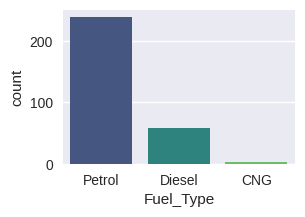

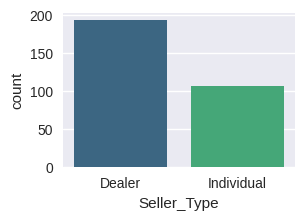

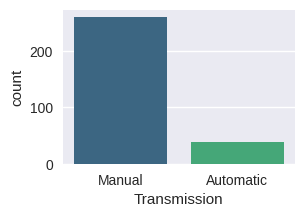

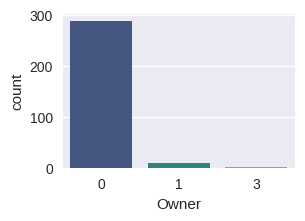

In [58]:
for col in countplot:

  plt.figure(figsize=(3, 2))
  sns.countplot(x = data[col], palette='viridis')

  plt.xlabel(col)
  plt.show()

In [66]:
outliers = ['Selling_Price' , 'Present_Price','Kms_Driven']

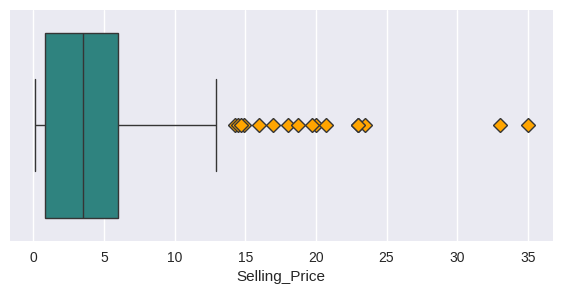

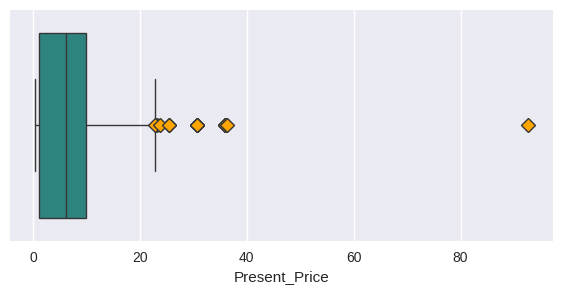

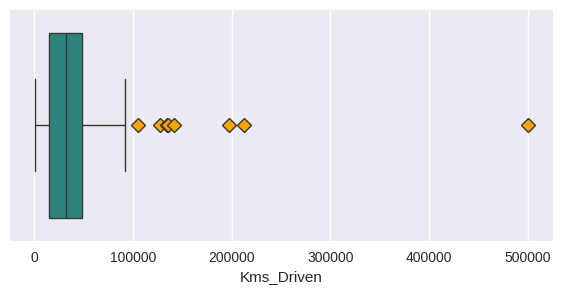

In [74]:
for i in outliers:
  plt.figure(figsize=(7,3))
  sns.boxplot(x=data[i] , palette='viridis' , flierprops = dict(marker='D' , markerfacecolor='orange'))
  plt.xlabel(i)
  plt.show()

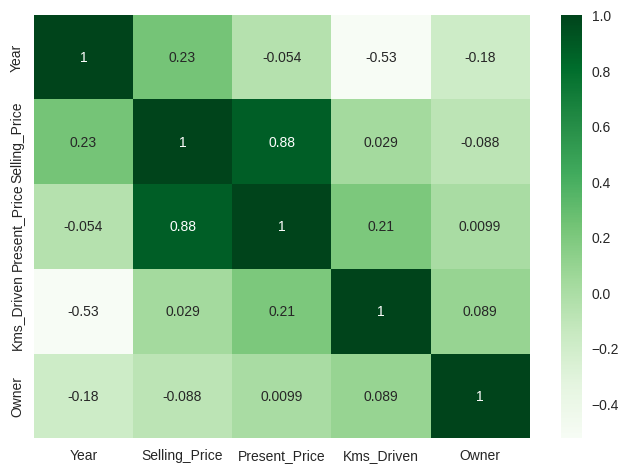

In [81]:
sns.heatmap(data.select_dtypes(include='number').corr() , annot=True , cmap='Greens' )
plt.show()

In [84]:
data.select_dtypes(include='number').corr()['Selling_Price']

,Selling_Price
Year,0.234369
Selling_Price,1.000000
Present_Price,0.876378
Kms_Driven,0.028566
Owner,-0.087880


Data preparation for MODEL

In [85]:
data.drop(columns=['Car_Name'] , inplace=True)

In [86]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [90]:
for i in data.columns:
  if data[i].dtypes == 'object':
    data[i] = le.fit_transform(data[i])

In [92]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


Train-Test split

In [95]:
x= data.drop(columns='Selling_Price')
y = data['Selling_Price']

In [96]:
x.head(2)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0


In [98]:
y.head(2)

,Selling_Price
0,3.35
1,4.75


In [101]:
x.shape , y.shape

((299, 7), (299,))

In [102]:
from sklearn.model_selection import train_test_split

In [187]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state = 10)

In [188]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(224, 7)
(75, 7)
(224,)
(75,)


Model creation

In [189]:
from sklearn.linear_model import LinearRegression

In [190]:
my_model = LinearRegression()

In [191]:
my_model.fit(x_train , y_train)

LinearRegression()

In [192]:
y_pred = my_model.predict(x_test)

In [193]:
y_pred

array([ 2.47933232,  5.93399934,  2.2580603 ,  0.60433258,  6.61247602,
        1.45579328, -3.11399952,  1.06680754,  4.42298375,  8.9145004 ,
        4.56164052,  1.69528691, -0.65045666,  8.123102  ,  8.94362011,
        4.38477966, 14.50012414,  2.8391147 ,  1.97620698,  7.86608767,
       15.64721329, -2.09444924,  6.90413508,  0.35539871,  2.39463007,
        0.4388722 ,  0.13692277,  3.76173096, -0.20683564,  1.64214906,
        5.27639413, -0.26947826,  3.46823948,  1.46363623,  0.40017231,
        1.6261768 ,  4.49192828,  6.59833108,  0.32664609,  0.0745178 ,
        3.66447721,  7.12882798, 10.16445898,  7.58444849,  9.11828632,
        0.06710964,  1.13247594,  0.56332677, -3.88835516,  4.44094634,
        2.04331641,  1.38502335, -0.54701693,  4.35124666,  0.74241624,
        4.33475831,  2.87047303,  9.14900083,  7.82610633,  4.91115485,
        3.54978381,  3.59749809,  4.0429373 ,  5.75495393,  1.37886882,
        1.49245783, 19.992657  ,  9.10296466,  2.03372265,  5.92

In [194]:
table_y_pred = pd.Series(y_pred)
table_y_pred.head()

,0
0,2.479332
1,5.933999
2,2.258060
3,0.604333
4,6.612476


In [198]:
from sklearn.metrics import *

In [199]:
result = r2_score(y_test , y_pred)

In [200]:
result*100

85.29002904467798

In [202]:
mse = mean_squared_error(y_test , y_pred)
print(mse)

2.6059503309349124


In [204]:
mae = mean_absolute_error(y_test , y_pred)
print(mae)

1.1424699441906672


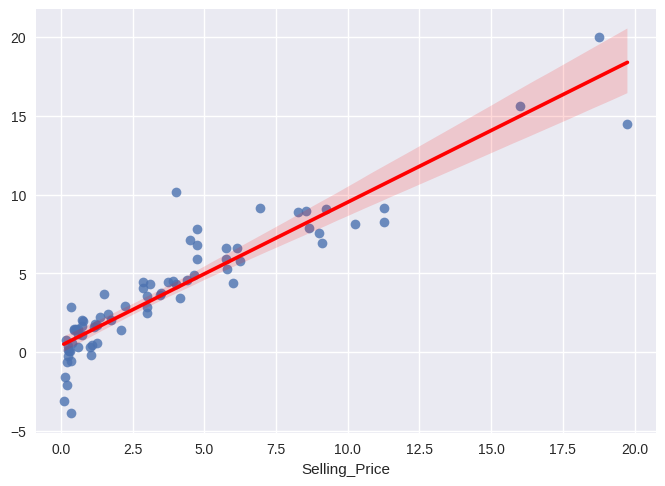

In [208]:
sns.regplot(x=y_test , y = y_pred , line_kws={'color': 'red'})
plt.show()

I will work on it after i learn more models